In [1]:
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

La première ligne sert à activer le rendu graphique, pour tout le fichier notebook. Pour **dessiner des graphiques**, il vous est conseillé de suivre la méthode illustrée par le code suivant que vous pouvez executer dans une deuxième cellule notebook.

<IPython.core.display.Javascript object>


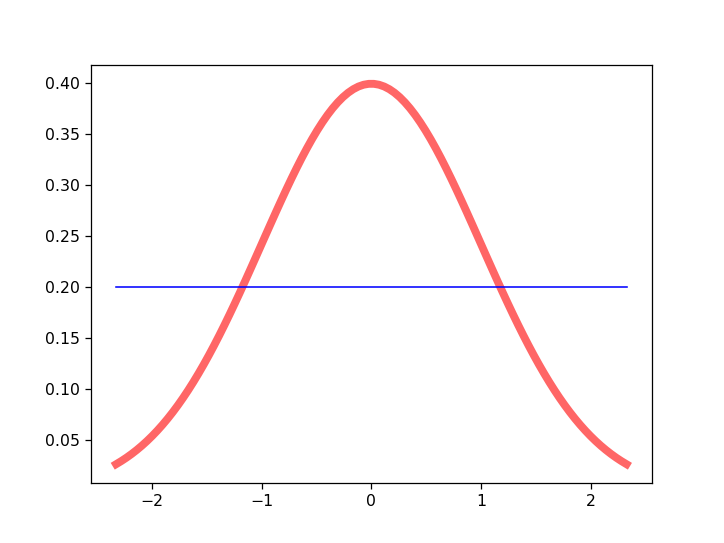

In [2]:
fig, ax = plt.subplots()
x = np.linspace(norm.ppf(0.01),
                norm.ppf(0.99), 100)

ax.plot(x, norm.pdf(x),
       'r-', lw=5, alpha=0.6)

ax.plot(x, np.full(len(x), 0.2),
       'b-', lw=1)

fig.show()

* Creation des objets `fig`et `ax`
* Ajout successif de graphiques sur la même figure par l'appel à des methodes de l'objet `ax`
* Affichage de la figure complète via `fig.show()`
* Evaluation de la cellule pour visualisation dans la cellule de résultats.

L'affichage dans la cellule de rendu du notebook devrait confirmer la bonne installation des dépendances.

### Description statistique des Fold Change

##### source:`data/TCL_wt1.tsv`

##### 1. Charger le contenu de ce fichier dans un notebook en eliminant les lignes porteuses de valeurs numériques aberrantes.

##### 2. Representez par un histogramme les valeurs de `Log2 Corrected Abundance Ratio`

##### 3. A partir de cette échantillon de ratio d'abondance,  estimez la moyenne <img src="https://render.githubusercontent.com/render/math?math=\mu"> et l'ecart-type <img src="https://render.githubusercontent.com/render/math?math=\sigma"> d'une loi normale.

In [3]:
with open("data/TCL_wt1.tsv", "r") as f:
    thelist = f.readlines()

In [4]:
def arefloat(i):
    try:
        float(i)
    except:
        return False
    return True

In [5]:
thelist[1][:-2]

'P75936\tBasal-body rod modification protein FlgD OS=Escherichia coli (strain K12) OX=83333 GN=flgD PE=3 SV=1\tflgD\t0.075816993\t-3.721334942\t5.49456E-05\t4.26006746'

In [6]:
thelist[1][:-2].split("\t")

['P75936',
 'Basal-body rod modification protein FlgD OS=Escherichia coli (strain K12) OX=83333 GN=flgD PE=3 SV=1',
 'flgD',
 '0.075816993',
 '-3.721334942',
 '5.49456E-05',
 '4.26006746']

In [7]:
thelist[0].split("\t")

['Accession',
 'Description',
 'Gene Symbol',
 'Corrected Abundance ratio (1.53)',
 'Log2 Corrected Abundance Ratio',
 'Abundance Ratio Adj. P-Value: (127. T3 Tc WT) / (126. T0 WT)',
 '-LOG10 Adj.P-val\n']

In [8]:
newlist=[]

for line in thelist:
    l_tab = (line.split("\n")[0]).split("\t")
    new_line = tuple(l_tab)
    if len(l_tab) == 7:
        if arefloat(l_tab[3]) and arefloat(l_tab[6]) and arefloat(l_tab[4]) and arefloat(l_tab[5]) and l_tab[0] !="" and l_tab[1]!="" and l_tab[2]!="":
            a = new_line[0]
            b = new_line[1]
            c = new_line[2]
            d = float(new_line[3])
            e = float(new_line[4])
            f = float(new_line[5])
            g = float(new_line[6])
            newlist.append((a,b,c,d,e,f,g))
        

In [9]:
len(newlist)

1746

##### 2. Representez par un histogramme les valeurs de `Log2 Corrected Abundance Ratio`



In [10]:
Ratio = np.asarray([el[4] for el in newlist])

<IPython.core.display.Javascript object>


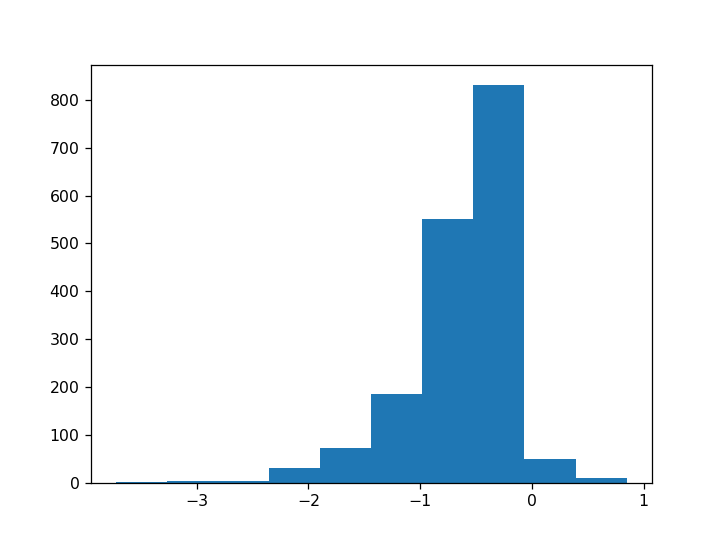

In [11]:
fig, ax = plt.subplots()


ax.hist(Ratio)

fig.show()

##### 3. A partir de cette échantillon de ratio d'abondance,  estimez la moyenne et l'ecart-type  d'une loi normale.

In [12]:
moy = np.mean(Ratio)
moy

-0.63862621564433

In [13]:
var = np.var(Ratio)*len(Ratio)/(len(Ratio)-1)
std = var**0.5
std, var

(0.4707593462304346, 0.22161436206330618)

<IPython.core.display.Javascript object>


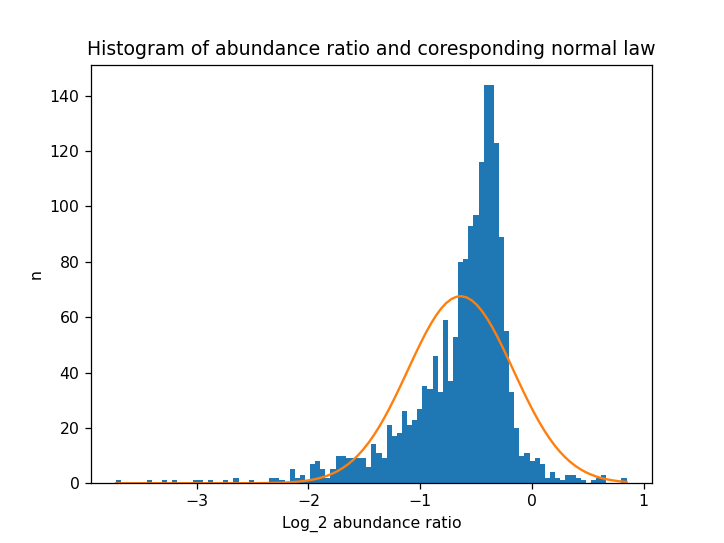

In [23]:
fig, ax = plt.subplots()
hist = ax.hist(Ratio, bins=100) # draw histogram
x = np.linspace(min(Ratio), max(Ratio), 100) # generate PDF domain points
dx = hist[1][1] - hist[1][0] # Get single value bar height
scale = len(Ratio)*dx # scale accordingly
ax.plot(x, norm.pdf(x, moy, std)*scale) # compute theoritical PDF and draw it
ax.set_xlabel("Log_2 abundance ratio")
ax.set_ylabel("n")
ax.set_title("Histogram of abundance ratio and coresponding normal law")
fig.show()

In [15]:
pval = np.asarray([el[6] for el in newlist])

<IPython.core.display.Javascript object>


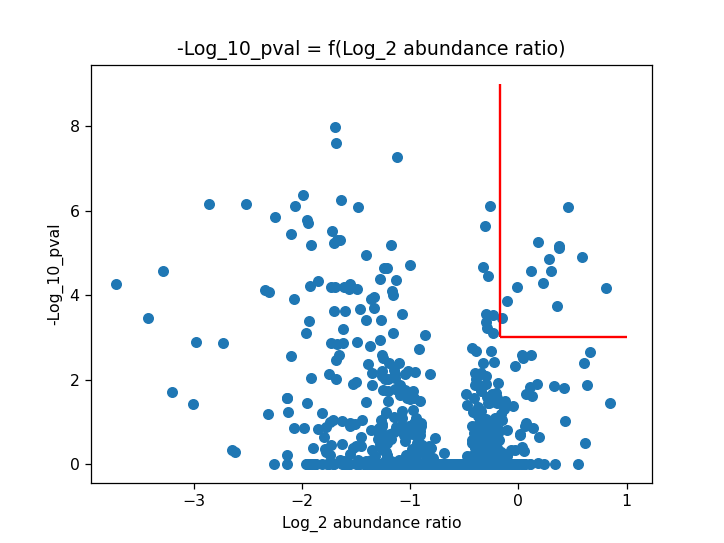

In [20]:
fig, ax = plt.subplots()
x = Ratio 
y = pval

ax.scatter(x,y) # compute theoritical PDF and draw it
ax.vlines(moy+std,3,9,colors = "r")
ax.hlines(3,moy+std,1,colors = "r")
ax.set_xlabel("Log_2 abundance ratio")
ax.set_ylabel("-Log_10_pval")
ax.set_title("-Log_10_pval = f(Log_2 abundance ratio)")
fig.show()

In [21]:
moy+std

-0.1678668694138954

In [37]:
tmp1 = np.argwhere(Ratio > moy+std)

In [46]:
tmp2 = np.argwhere(pval[tmp1]>3)
tmp2[:,0]

array([ 6, 26, 45, 67, 72, 74, 76, 77, 80, 81, 82, 85, 87, 92],
      dtype=int64)

In [49]:
index = tmp1[tmp2[:,0]]
Ratio[index]

array([[-0.1499092 ],
       [-0.10256973],
       [-0.0132619 ],
       [ 0.11504195],
       [ 0.18140401],
       [ 0.2312557 ],
       [ 0.27944216],
       [ 0.29950135],
       [ 0.36026328],
       [ 0.37123996],
       [ 0.37269723],
       [ 0.46165866],
       [ 0.58810221],
       [ 0.81139043]])

<IPython.core.display.Javascript object>


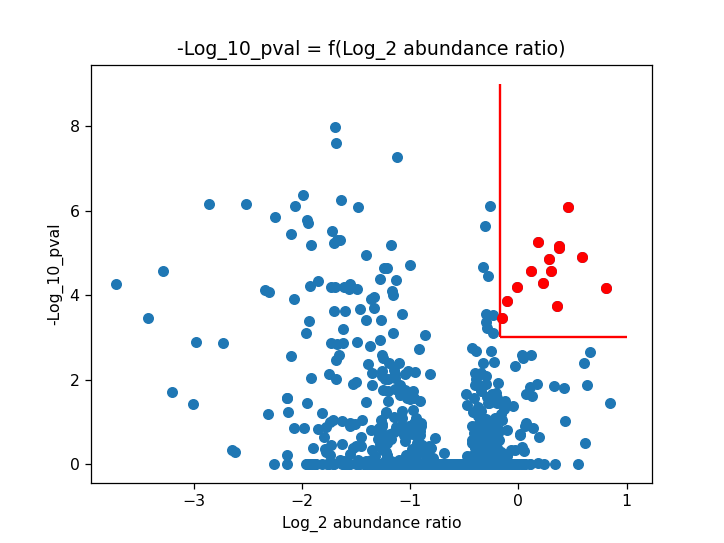

In [51]:
fig, ax = plt.subplots()
x = Ratio 
y = pval
x_2 = Ratio[index]
y_2 = pval[index]
ax.scatter(x,y) # compute theoritical PDF and draw it
ax.scatter(x_2,y_2,color ="red") # compute theoritical PDF and draw it
ax.vlines(moy+std,3,9,colors = "r")
ax.hlines(3,moy+std,1,colors = "r")
ax.set_xlabel("Log_2 abundance ratio")
ax.set_ylabel("-Log_10_pval")
ax.set_title("-Log_10_pval = f(Log_2 abundance ratio)")
fig.show()

In [52]:
access = [el[0] for el in newlist]

In [57]:
expresp = [access[i[0]] for i in index]

In [58]:
expresp

['P0A8V6',
 'P0A9Q1',
 'P02358',
 'P0ACF8',
 'P62399',
 'P0A905',
 'P76506',
 'P13036',
 'P10384',
 'P06971',
 'P0A910',
 'P06996',
 'P76344',
 'P02931']